## Brick Alignment Check

#### General Description:
The bond or joint pattern of a masonry wall can have a significant influence on its flexural strength. The brick alignment classifier will check for the bond pattern in walls from wall images. Specifically, the classifier will distinguish between a compliant or a non-compliant wall, as defined on the basis of its proximity to a running bond or a stack bond respectively, as shown in the images below

<img src="alignmentcheck.png" width=300 height=300 >
<!-- <img src="wallnogo.png" width=125 height=125, img align="left" > -->

#### Threshold for compliance:
For a wall to be compliant on the basis of this check, the head joints in the successive rows of bricks should be horizontally offset by at least one quarter the unit length

#### Methodology of Check:
The current methodology setup for checking the bond pattern is as follows:
1. Process a wall image to get contours of bricks (Segmentation technique TBD)
2. From the contours, obtain the centroid point of each brick
3. Group the centroids corresponding to each row of bricks (approximated by comparing the y coordinate of centroid points)
4. Calculate the difference in x coordinates of successive rows
5. Divide the difference by the average unit length of the bricks being compared
6. If the horizontal offset is less than 0.25, the image is classified as "No Go", otherwise "Go"

#### Outputs:
 - “Go” or “No Go” label for compliant and non-compliant bond pattern respectively
 - The original image with the non-compliant rows highlighted
 - Overall score and percentage of compliant rows with respect to all the rows

#### Constraints
For the classifier to correctly identify the bond pattern, the input images submitted to the mobile app should meet the following requirements:
 - The input image should be cropped to show just the bricks and bond pattern (with the windows cropped out for instance)
 - If more than one wall is being checked at a time, a separate photo should be taken for each wall

***

## Step 1: Image Processing

#### Load Images

In [21]:
import os
import random


### CHANGE THE DIRECTORY PATH TO THE FOLDER WITH TEST IMAGES
dirpath = "G:/My Drive/BuildChange/ISAC-SIMO/Block Alignment/TestImages_BIM"+"/"

def loadImages(dirpath):
    filepaths  = [dirpath+file for file in os.listdir(dirpath)]
    random.shuffle(filepaths)
    return filepaths

#### Display images

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

# Display one image
def display_one(a, title1 = "Original", mode=None):
    plt.imshow(a,mode), plt.title(title1)
    plt.show()
    
# Display two images
def display_two(a, b, title1 = "Original", title2 = "Edited",mode=None):
    plt.subplot(121), plt.imshow(a,mode), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,mode), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
# Display multiple images
def display_many(images,titles,mode=None):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(2, 3, plt_idx)
        plt.title(titles[i])
        plt.imshow(img,mode)
    plt.show()

### Process Images



#### Step 1: Get centroid of bricks from the contours

#### Method 1
This method currently works for the BIM Generated Images, but not on the real wall images

IMAGE  1 , NAME:  T_BA_Go_1003_Gen3_0229_309_1.png


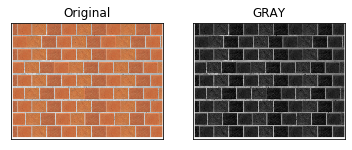

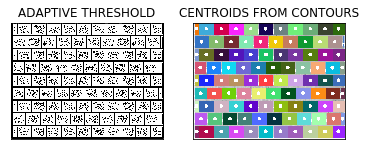

No. of Centroids:  98
IMAGE  2 , NAME:  T_BA_NoGo_2057_Gen4_0302_63_2.png


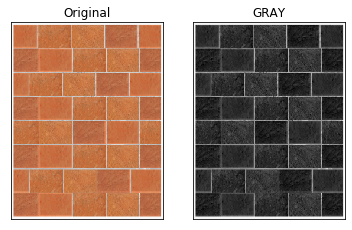

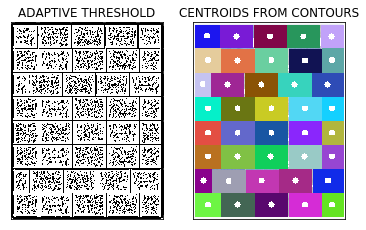

No. of Centroids:  40
IMAGE  3 , NAME:  T_BA_NoGo_2058_Gen4_0302_64_0.png


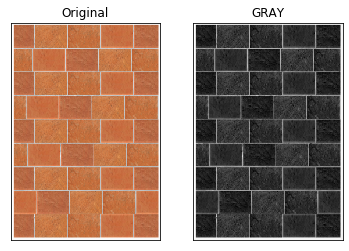

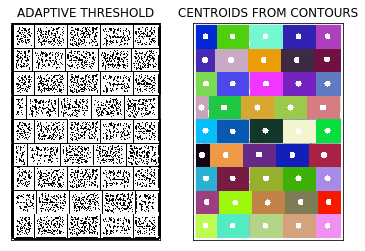

No. of Centroids:  45
IMAGE  4 , NAME:  T_BA_Go_1004_Gen3_0229_31_0.png


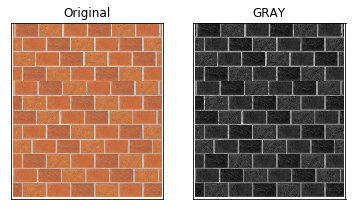

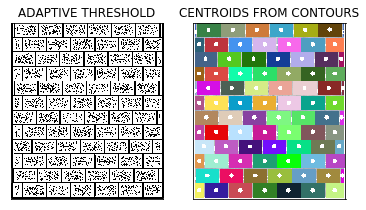

No. of Centroids:  83
IMAGE  5 , NAME:  T_BA_Go_1004_Gen3_0229_31_1.png


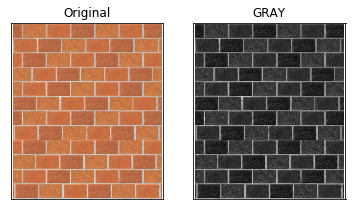

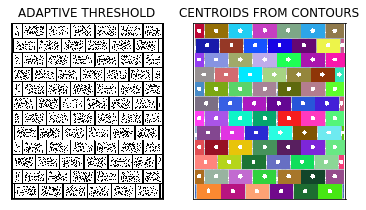

No. of Centroids:  83
IMAGE  6 , NAME:  T_BA_NoGo_2062_Gen4_0302_68_2.png


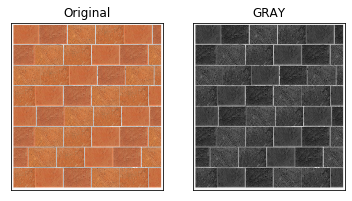

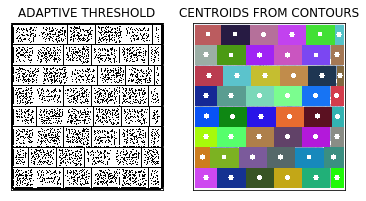

No. of Centroids:  48
IMAGE  7 , NAME:  T_BA_Go_1001_Gen3_0229_307_1.png


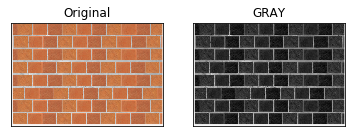

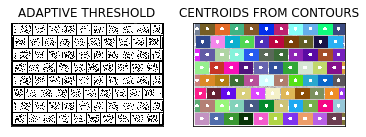

No. of Centroids:  87
IMAGE  8 , NAME:  T_BA_NoGo_2057_Gen4_0302_63_0.png


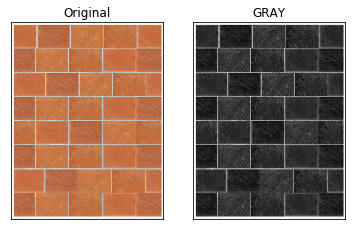

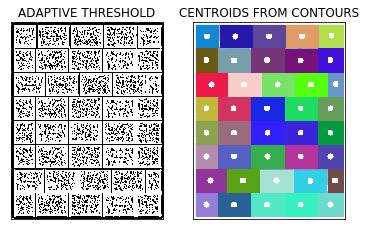

No. of Centroids:  40
IMAGE  9 , NAME:  T_BA_NoGo_2060_Gen4_0302_66_1.png


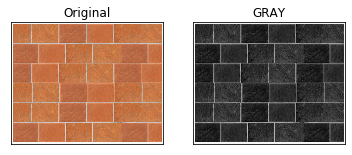

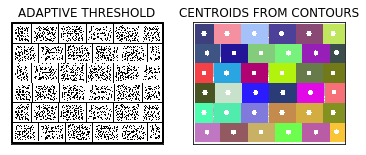

No. of Centroids:  36
IMAGE  10 , NAME:  T_BA_NoGo_2064_Gen4_0302_70_2.png


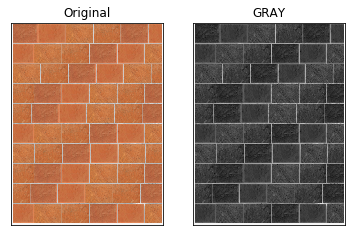

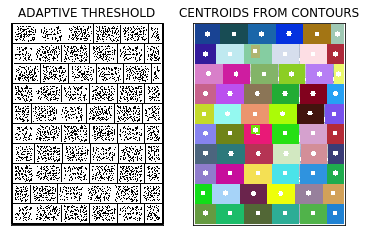

No. of Centroids:  62
IMAGE  11 , NAME:  T_BA_NoGo_2060_Gen4_0302_66_2.png


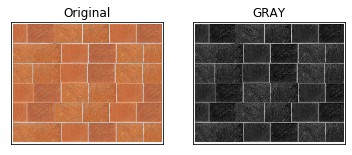

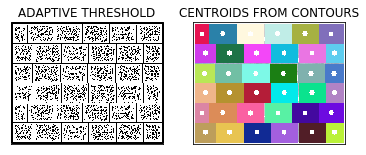

No. of Centroids:  36
IMAGE  12 , NAME:  T_BA_NoGo_2060_Gen4_0302_66_0.png


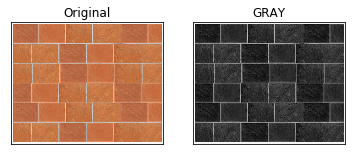

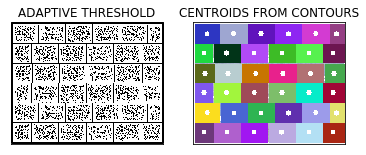

No. of Centroids:  36
IMAGE  13 , NAME:  T_BA_NoGo_2065_Gen4_0302_71_0.png


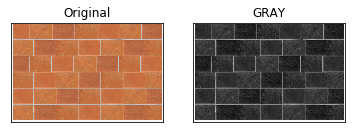

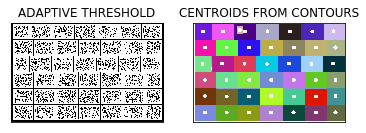

No. of Centroids:  43
IMAGE  14 , NAME:  T_BA_Go_1003_Gen3_0229_309_0.png


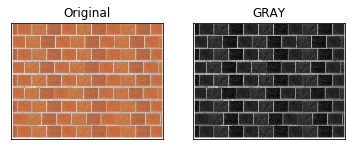

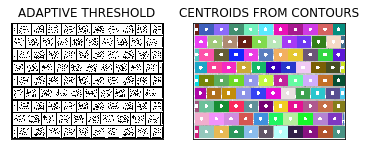

No. of Centroids:  98
IMAGE  15 , NAME:  T_BA_NoGo_2063_Gen4_0302_69_1.png


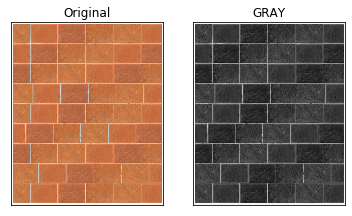

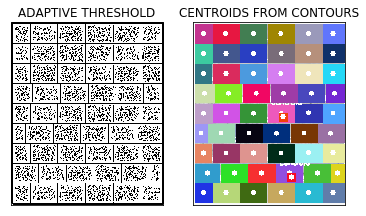

No. of Centroids:  56
IMAGE  16 , NAME:  T_BA_Go_1004_Gen3_0229_31_2.png


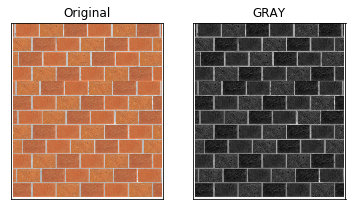

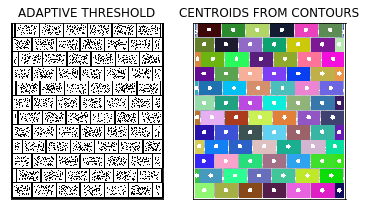

No. of Centroids:  83
IMAGE  17 , NAME:  T_BA_NoGo_2064_Gen4_0302_70_0.png


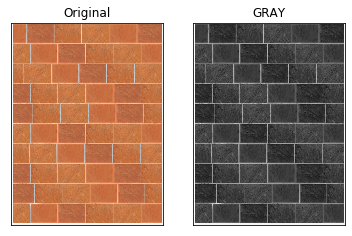

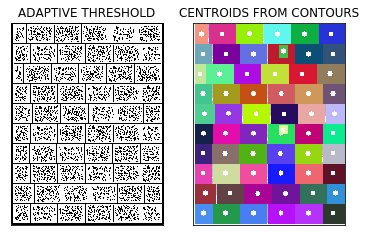

No. of Centroids:  62
IMAGE  18 , NAME:  T_BA_NoGo_2063_Gen4_0302_69_2.png


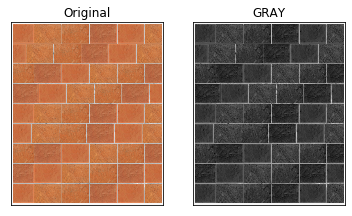

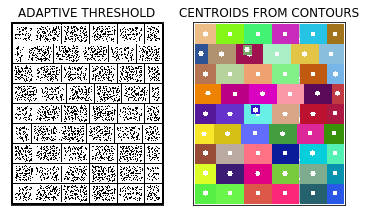

No. of Centroids:  56
IMAGE  19 , NAME:  T_BA_Go_1000_Gen3_0229_306_0.png


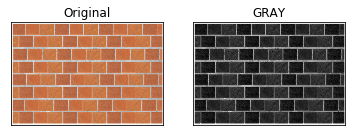

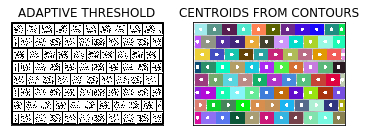

No. of Centroids:  88
IMAGE  20 , NAME:  T_BA_NoGo_2058_Gen4_0302_64_2.png


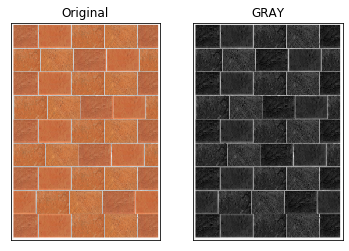

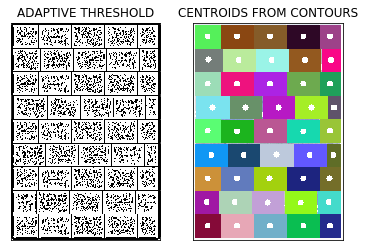

No. of Centroids:  45
IMAGE  21 , NAME:  T_BA_NoGo_2059_Gen4_0302_65_1.png


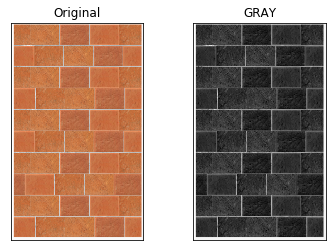

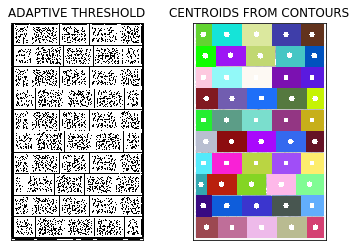

No. of Centroids:  50
IMAGE  22 , NAME:  T_BA_Go_1002_Gen3_0229_308_0.png


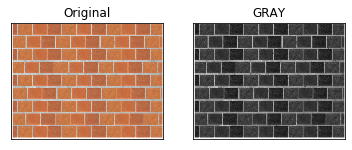

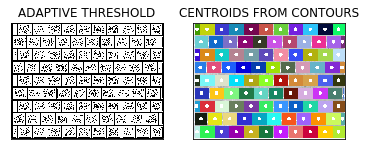

No. of Centroids:  98
IMAGE  23 , NAME:  T_BA_NoGo_2062_Gen4_0302_68_1.png


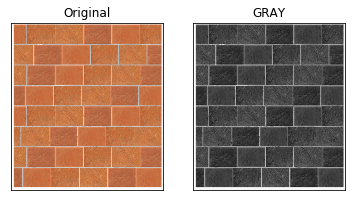

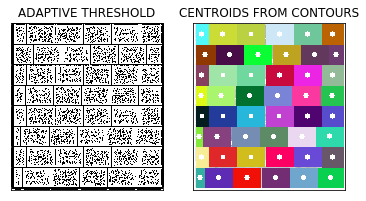

No. of Centroids:  48
IMAGE  24 , NAME:  T_BA_NoGo_2059_Gen4_0302_65_0.png


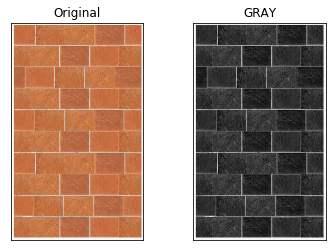

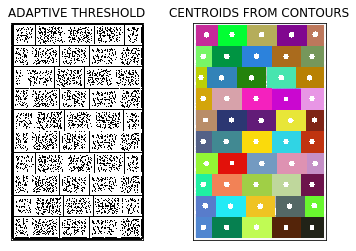

No. of Centroids:  50
IMAGE  25 , NAME:  T_BA_NoGo_2065_Gen4_0302_71_1.png


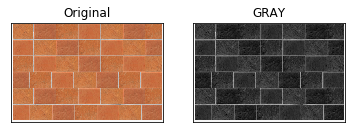

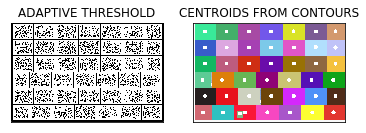

No. of Centroids:  43
IMAGE  26 , NAME:  T_BA_NoGo_2058_Gen4_0302_64_1.png


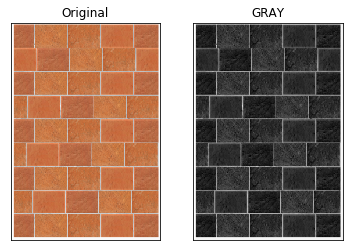

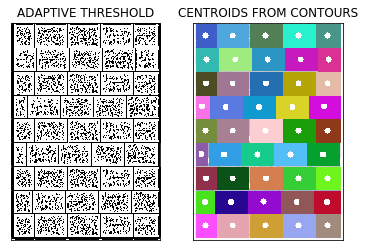

No. of Centroids:  45
IMAGE  27 , NAME:  T_BA_NoGo_2063_Gen4_0302_69_0.png


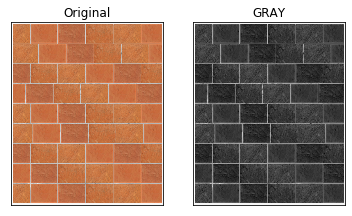

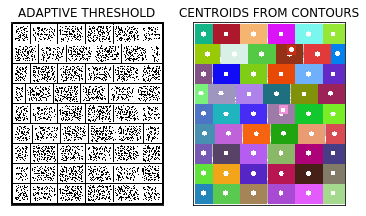

No. of Centroids:  56
IMAGE  28 , NAME:  T_BA_Go_1002_Gen3_0229_308_2.png


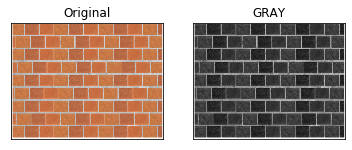

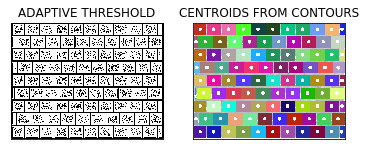

No. of Centroids:  98
IMAGE  29 , NAME:  T_BA_Go_1000_Gen3_0229_306_1.png


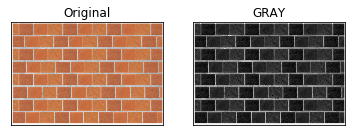

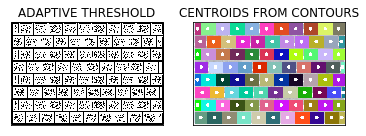

No. of Centroids:  88
IMAGE  30 , NAME:  T_BA_Go_1000_Gen3_0229_306_2.png


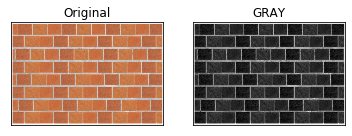

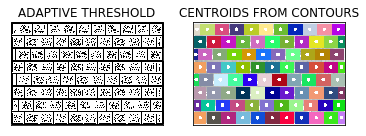

No. of Centroids:  88
IMAGE  31 , NAME:  T_BA_Go_1001_Gen3_0229_307_2.png


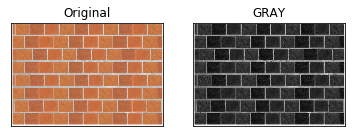

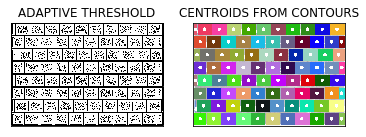

No. of Centroids:  87
IMAGE  32 , NAME:  T_BA_NoGo_2064_Gen4_0302_70_1.png


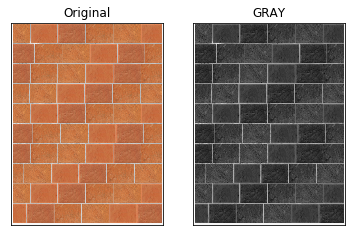

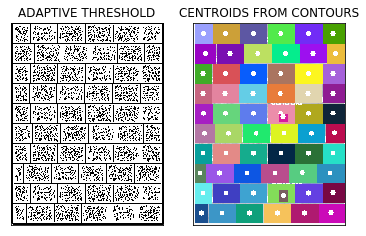

No. of Centroids:  62
IMAGE  33 , NAME:  T_BA_NoGo_2066_Gen4_0302_72_0.png


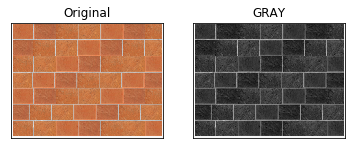

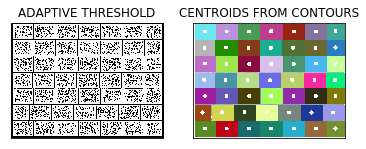

No. of Centroids:  49
IMAGE  34 , NAME:  T_BA_NoGo_2057_Gen4_0302_63_1.png


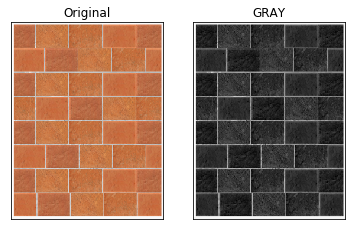

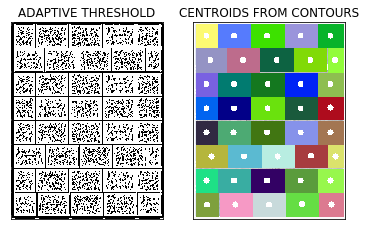

No. of Centroids:  40
IMAGE  35 , NAME:  T_BA_NoGo_2065_Gen4_0302_71_2.png


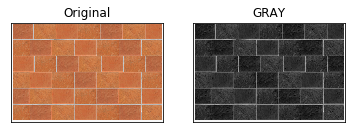

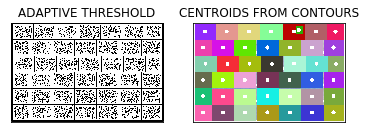

No. of Centroids:  43
IMAGE  36 , NAME:  T_BA_NoGo_2059_Gen4_0302_65_2.png


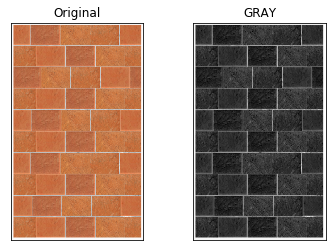

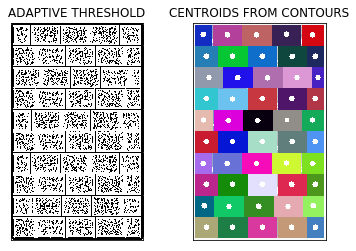

No. of Centroids:  50


In [34]:
import os
import cv2
import random
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


global dirpath
filepaths = loadImages(dirpath)

for i,filepath in enumerate(filepaths):
    img = cv2.imread(filepath)
    
    # CONVERT TO RGB
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #CONVERT TO GRAY
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     #APPLY CANNY EDGE TO GRAY IMAGE
#     edges = cv2.Canny(gray,190,200,apertureSize = 3)
    
    #CONVERT TO HSV
    hsv =cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
    
    # GET SATURATION FROM HSV
    S=hsv[:,:,1]

    # APPLY ADAPTIVE GAUSSIAN THRESHOLD
    th_ag = cv2.adaptiveThreshold(S,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,2)

    # FIND CONTOURS
    contours,h = cv2.findContours(th_ag, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#     fraction =img.shape[0:2][0]/6
#     print(fraction)
    centroids = []
    cXs = []
    cYs = []
    
    for c in contours:
        area = cv2.contourArea(c)

        if area > 100:
            (x, y, w, h) = cv2.boundingRect(c)

            # Draw the conours
            #cv2.drawContours(img, [c], -1, (0, 255, 0), 2)

            # Get random color for each brick
            tpl = tuple([random.randint(0, 255) for _ in range(3)])
            cv2.rectangle(img, (x, y), (x + w, y + h), tpl, -1)
            
            # calculate moments for each contour
            M = cv2.moments(c)
        
            # calculate x,y coordinate of center
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            centroids.append([cX,cY])
            cXs.append(cX)
            cYs.append(cY)
            cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
            cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)            
            
    #Display Images
    print("IMAGE ",i+1,", NAME: ",os.path.basename(filepath))
    display_two(rgb,gray,title2="GRAY",mode="gray")
    display_two(th_ag,img,title1="ADAPTIVE THRESHOLD",title2="CENTROIDS FROM CONTOURS",mode="gray")
    print("No. of Centroids: ",len(centroids))

